In [1]:
import cv2  
import math 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from keras.preprocessing import image 
from keras.applications.xception import preprocess_input
import numpy as np  
from keras.utils import np_utils
from skimage.transform import resize 
import os
from PIL import Image
import tensorflow as tf

Using TensorFlow backend.


# 훈련(train) 데이터 전처리

In [2]:
train_image_data = pd.read_csv('mapping_train_image.csv')     # reading the csv file
train_image_data.head()      # printing first five rows of the file

,Image_ID,Class
0,20200214_GRF_APK_3_train_image_0000.jpg,0
1,20200214_GRF_APK_3_train_image_0001.jpg,0
2,20200214_GRF_APK_3_train_image_0002.jpg,0
3,20200214_GRF_APK_3_train_image_0003.jpg,0
4,20200214_GRF_APK_3_train_image_0004.jpg,0


In [3]:
# 훈련용 이미지 데이터 전처리

X_image = [ ]
for img_name in train_image_data.Image_ID:
    img = plt.imread('' + './train_image/'+img_name) # train_image: 이미지 54000장 있는 폴더
    X_image.append(img)
X_image = np.array(X_image)

image = []
for i in range(0,X_image.shape[0]):
    a = resize(X_image[i], preserve_range=True, output_shape=(100,100)).astype(int)
    image.append(a)
    
X_image = np.array(image)
X_image_train = preprocess_input(X_image)      # preprocessing the input data

y_image = train_image_data.Class
y_image_train = np_utils.to_categorical(y_image)    # one hot encoding Classes

In [4]:
train_mfcc_data = pd.read_csv('mapping_train_mfcc.csv') # train_image와 싱크가 맞아야 하므로 같은 라벨링 된 csv 파일 쓴다
train_mfcc_data.head()

,Image_ID,Class
0,20200214_GRF_APK_3_train_mfcc_0000.jpg,0
1,20200214_GRF_APK_3_train_mfcc_0001.jpg,0
2,20200214_GRF_APK_3_train_mfcc_0002.jpg,0
3,20200214_GRF_APK_3_train_mfcc_0003.jpg,0
4,20200214_GRF_APK_3_train_mfcc_0004.jpg,0


In [6]:
# 훈련용 mfcc 데이터 전처리

X_mfcc = [ ]
for img_name in train_mfcc_data.Image_ID:
    img = plt.imread('' + './train_mfcc/'+img_name)
    X_mfcc.append(img) 
X_mfcc = np.array(X_mfcc)  

image2 = []
for i in range(0,X_mfcc.shape[0]):
    a = resize(X_mfcc[i], preserve_range=True, output_shape=(100,100)).astype(int)
    image2.append(a)
    
X_mfcc = np.array(image2)
X_mfcc_train = preprocess_input(X_mfcc)      # preprocessing the input data

y_mfcc = train_mfcc_data.Class
y_mfcc_train = np_utils.to_categorical(y_mfcc)    # one hot encoding Classes

# 검증(validation) 데이터 전처리

In [7]:
# 약 1만장의 val set이 0, 1 클래스로 분류된 csv 파일 읽기

val_image_data = pd.read_csv('mapping_val_image.csv')     # reading the csv file
val_image_data.head()      # printing first five rows of the file

,Image_ID,Class
0,20200216_T1_GEN_1_val_image_0000.jpg,0
1,20200216_T1_GEN_1_val_image_0001.jpg,0
2,20200216_T1_GEN_1_val_image_0002.jpg,0
3,20200216_T1_GEN_1_val_image_0003.jpg,0
4,20200216_T1_GEN_1_val_image_0004.jpg,0


In [9]:
# 검증용 이미지 데이터 전처리

X_image = [ ]
for img_name in val_image_data.Image_ID:
    img = plt.imread('' + './val_image/'+img_name) # val_image: 이미지 9000장 있는 폴더
    X_image.append(img)
X_image = np.array(X_image)

image = []
for i in range(0,X_image.shape[0]):
    a = resize(X_image[i], preserve_range=True, output_shape=(100,100)).astype(int)
    image.append(a)
    
X_image = np.array(image)
X_image_val = preprocess_input(X_image)      # preprocessing the input data

y_image = val_image_data.Class
y_image_val = np_utils.to_categorical(y_image)    # one hot encoding Classes

In [10]:
val_mfcc_data = pd.read_csv('mapping_val_mfcc.csv') # train_image와 싱크가 맞아야 하므로 같은 라벨링 된 csv 파일 쓴다
val_mfcc_data.head()

,Image_ID,Class
0,20200216_T1_GEN_1_val_mfcc_0000.jpg,0
1,20200216_T1_GEN_1_val_mfcc_0001.jpg,0
2,20200216_T1_GEN_1_val_mfcc_0002.jpg,0
3,20200216_T1_GEN_1_val_mfcc_0003.jpg,0
4,20200216_T1_GEN_1_val_mfcc_0004.jpg,0


In [11]:
# 검증용 mfcc 데이터 전처리

X_mfcc = [ ]
for img_name in val_mfcc_data.Image_ID:
    img = plt.imread('' + './val_mfcc/'+img_name)
    X_mfcc.append(img) 
X_mfcc = np.array(X_mfcc)  

image2 = []
for i in range(0,X_mfcc.shape[0]):
    a = resize(X_mfcc[i], preserve_range=True, output_shape=(100,100)).astype(int)
    image2.append(a)
    
X_mfcc = np.array(image2)
X_mfcc_val = preprocess_input(X_mfcc)      # preprocessing the input data

y_mfcc = val_mfcc_data.Class
y_mfcc_val = np_utils.to_categorical(y_mfcc)    # one hot encoding Classes

# 모델 훈련

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, Dropout, Input, concatenate, TimeDistributed, Conv2D, Flatten, LSTM

In [13]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(100, 100, 3))    # include_top=False to remove the top layer

X_image_train = base_model.predict(X_image_train)
X_image_val = base_model.predict(X_image_val)

print(X_image_train.shape, X_image_val.shape)

X_mfcc_train = base_model.predict(X_mfcc_train)
X_mfcc_val = base_model.predict(X_mfcc_val)

print(X_mfcc_train.shape, X_mfcc_val.shape)

(54750, 3, 3, 2048) (9395, 3, 3, 2048)
(54750, 3, 3, 2048) (9395, 3, 3, 2048)


In [14]:
# 54750개의 train 데이터와 9395개의 test 데이터를 1개의 시간 단계로 나눈다.
# 그러면 54750개의 샘플로 구성된 배치에서, 각 샘플은 1개의 (3,3,2048) 차원의 데이터

# for image

X_image_train = X_image_train.reshape(54750, 1, 3, 3, 2048)
X_image_val = X_image_val.reshape(9395, 1, 3, 3, 2048)

X_image_train = X_image_train/X_image_train.max()      # centering the data
X_image_val = X_image_val/X_image_val.max()

print(X_image_train.shape, X_image_val.shape)

# for mfcc

X_mfcc_train = X_mfcc_train.reshape(54750, 1, 3, 3, 2048)
X_mfcc_val = X_mfcc_val.reshape(9395, 1, 3, 3, 2048)

X_mfcc_train = X_mfcc_train/X_mfcc_train.max()      # centering the data
X_mfcc_val = X_mfcc_val/X_mfcc_val.max()

print(X_mfcc_train.shape, X_mfcc_val.shape)

(54750, 1, 3, 3, 2048) (9395, 1, 3, 3, 2048)
(54750, 1, 3, 3, 2048) (9395, 1, 3, 3, 2048)


In [15]:
# i. Building the model

# 두 개의 입력층을 정의

inputA = Input(shape=(1, 3, 3, 2048))
inputB = Input(shape=(1, 3, 3, 2048))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = TimeDistributed(Conv2D(2048, (2, 2), activation='relu'))(inputA)
x = TimeDistributed(Flatten())(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = LSTM(128)(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = TimeDistributed(Conv2D(2048, (2, 2), activation='relu'))(inputB)
y = TimeDistributed(Flatten())(y)
y = Dense(1024, activation="relu")(y)
y = Dense(512, activation="relu")(y)
y = LSTM(128)(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])
# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(4, activation="relu")(result)
# 2개 클래스로 결과를 보여줄 softmax
z = Dense(2, activation="softmax")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1, 3, 3, 204 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1, 3, 3, 204 0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 1, 2, 2, 2048 16779264    input_2[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 1, 2, 2, 2048 16779264    input_3[0][0]                    
____________________________________________________________________________________________

In [17]:
# ii. Compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

# iii. Training the model - 라벨값은 y_mfcc_train이든 y_image_train이든 상관 X, 어차피 둘 다 똑같음

history = model.fit([X_image_train,X_mfcc_train], y_image_train, batch_size=64, epochs=10,
                    validation_data=([X_image_val,X_mfcc_val], y_image_val), verbose=2)

Train on 54750 samples, validate on 9395 samples
Epoch 1/10
54750/54750 - 24s - loss: 0.2593 - accuracy: 0.8905 - precision: 0.8905 - recall: 0.8905 - val_loss: 0.3695 - val_accuracy: 0.8042 - val_precision: 0.8042 - val_recall: 0.8042
Epoch 2/10
54750/54750 - 20s - loss: 0.2206 - accuracy: 0.9084 - precision: 0.9084 - recall: 0.9084 - val_loss: 0.4488 - val_accuracy: 0.8563 - val_precision: 0.8563 - val_recall: 0.8563
Epoch 3/10
54750/54750 - 20s - loss: 0.1867 - accuracy: 0.9236 - precision: 0.9236 - recall: 0.9236 - val_loss: 0.5719 - val_accuracy: 0.7952 - val_precision: 0.7952 - val_recall: 0.7952
Epoch 4/10
54750/54750 - 20s - loss: 0.1543 - accuracy: 0.9395 - precision: 0.9395 - recall: 0.9395 - val_loss: 0.5932 - val_accuracy: 0.7718 - val_precision: 0.7718 - val_recall: 0.7718
Epoch 5/10
54750/54750 - 20s - loss: 0.1302 - accuracy: 0.9498 - precision: 0.9498 - recall: 0.9498 - val_loss: 0.6377 - val_accuracy: 0.7704 - val_precision: 0.7704 - val_recall: 0.7704
Epoch 6/10
54750

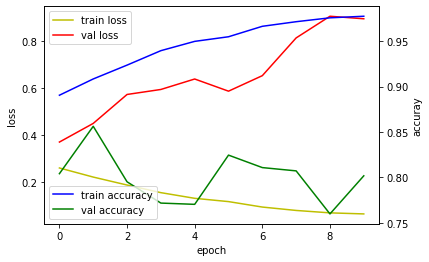

In [18]:
# 학습과정 살펴보기

#print(history.history['loss'])
#print(history.history['accuracy'])
#print(history.history['val_loss'])
#print(history.history['val_accuracy'])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 테스트 데이터에 대한 predict

In [19]:
test_image_csv = pd.read_csv('mapping_test_image.csv')
test_image_csv.head()

,Image_ID,Pred_Class,Real_Class
0,20200411_APK_HLE_1_test_image_0001.jpg,NaN,0
1,20200411_APK_HLE_1_test_image_0002.jpg,NaN,0
2,20200411_APK_HLE_1_test_image_0003.jpg,NaN,0
3,20200411_APK_HLE_1_test_image_0004.jpg,NaN,0
4,20200411_APK_HLE_1_test_image_0005.jpg,NaN,0


In [20]:
test_mfcc_csv = pd.read_csv('mapping_test_mfcc.csv')
test_mfcc_csv.head()

,Image_ID,Pred_Class,Real_Class
0,20200411_APK_HLE_1_test_mfcc_0001.jpg,NaN,0
1,20200411_APK_HLE_1_test_mfcc_0002.jpg,NaN,0
2,20200411_APK_HLE_1_test_mfcc_0003.jpg,NaN,0
3,20200411_APK_HLE_1_test_mfcc_0004.jpg,NaN,0
4,20200411_APK_HLE_1_test_mfcc_0005.jpg,NaN,0


In [21]:
# for image

test_image = []
for img_name in test_image_csv.Image_ID:
    img = plt.imread('' + './test_image/'+img_name)
    test_image.append(img)
    
test_arr_image = np.array(test_image)

test_image = []
for i in range(0,test_arr_image.shape[0]):
    a = resize(test_arr_image[i], preserve_range=True, output_shape=(100,100)).astype(int)
    test_image.append(a)
    
test_image = np.array(test_image)

# for mfcc

test_mfcc = []
for img_name in test_mfcc_csv.Image_ID:
    img = plt.imread('' + './test_mfcc/'+img_name)
    test_mfcc.append(img)
    
test_arr_mfcc = np.array(test_mfcc)

test_mfcc = []
for i in range(0,test_arr_mfcc.shape[0]):
    a = resize(test_arr_mfcc[i], preserve_range=True, output_shape=(100,100)).astype(int)
    test_mfcc.append(a)
    
test_mfcc = np.array(test_mfcc)

In [22]:
# preprocessing the images
test_image = preprocess_input(test_image)
test_mfcc = preprocess_input(test_mfcc)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_mfcc = base_model.predict(test_mfcc)

# converting the images
test_image = test_image.reshape(7680, 1, 3, 3, 2048) # 7680 = 테스트 이미지 수, (1, 3, 3, 2048): 베이스 모델 통과한 결과값
test_mfcc = test_mfcc.reshape(7680, 1, 3, 3, 2048) # 7680 = 테스트 이미지 수, (1, 3, 3, 2048): 베이스 모델 통과한 결과값

# zero centered images
test_image = test_image/test_image.max()
test_mfcc= test_mfcc/test_mfcc.max()

In [23]:
# non-HL, HL일 확률 제시

predictions_prob = model.predict([test_image,test_mfcc])

# 위 값을 토대로 클래스를 제시

predictions_class = []

for i in range(predictions_prob.shape[0]):
    if predictions_prob[i][0] > 0.5: # 기준 0.5
        predictions_class.append(0)
    else:
        predictions_class.append(1)
        
# 이렇게 하면 model.predict_class가 하는 기능과 똑같음

In [24]:
print(predictions_prob)

[[9.9920899e-01 7.9101656e-04]
 [9.9899513e-01 1.0048930e-03]
 [9.8921144e-01 1.0788607e-02]
 ...
 [9.9561322e-01 4.3867617e-03]
 [8.5301244e-01 1.4698759e-01]
 [7.0805287e-01 2.9194713e-01]]


In [25]:
print(predictions_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
print("The screen time of non highlight is", predictions_class.count(0)/2, "seconds")
print("The screen time of highlight is", predictions_class.count(1)/2, "seconds")

The screen time of non highlight is 3330.0 seconds
The screen time of highlight is 510.0 seconds


In [29]:
# 0, 1클래스를 추가해서 새로 csv 파일 만듦

csv = pd.read_csv('mapping_test_image.csv') # test 이미지 파일명이 담긴 csv파일

csv['Pred_Class'] = predictions_class # predictions_class은 np.array 형태
    
csv.to_csv('test_result_LSTM_VA1.csv', index=False)

In [35]:
print('하이라이트라고 예측한 이미지 수: ', list(predictions_class).count(1))
n = 0
for i in range(len(result['Real_Class'])):
    if result['Real_Class'][i] == 1:
        n += 1
        
print('실제 하이라이트 이미지 수: ', n)

하이라이트라고 예측한 이미지 수:  1020
실제 하이라이트 이미지 수:  841


In [37]:
result = pd.read_csv('test_result_LSTM_VA1.csv')

num = 0
for i in range(len(result['Real_Class'])):
    if result['Pred_Class'][i] == result['Real_Class'][i]:
        num += 1
        
print('HL인 부분과 HL이 아닌 부분을 동시에 맞췄을 확률:', num/len(result['Pred_Class']))

k = 0
for i in range(len(result['Real_Class'])):
    if result['Pred_Class'][i] == 1 and result['Real_Class'][i] == 1:
        k += 1
        
print('실제로 HL인 부분중 HL이라고 예측했을 확률:', k/sum(result['Real_Class']))

HL인 부분과 HL이 아닌 부분을 동시에 맞췄을 확률: 0.8696614583333333
실제로 HL인 부분중 HL이라고 예측했을 확률: 0.5112960760998811


오히려 Video만 썼을 때가 Video+Audio인 경우보다 조금 더 좋음. (바로 위에 쓰여진 확률도 비교해보면 그렇고, Video+Audio일때 val loss가 조금 더 큼)

0.5초마다의 mfcc이므로 너무 짧아서 별 의미가 없고 오히려 노이즈로 작용했을 수도.

이 이후로는 팀 공동 데이터로 작업함.